In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import math
import scipy
import copy
import os
import matplotlib.pyplot as plt
from libwallerlab.projects.motiondeblur import blurkernel
from libwallerlab.projects.motiondeblur import bluranalysis as analysis

plt.style.use('deblur')

In [2]:
figure_directory = '/Users/zfphil/Dropbox/Berkeley/Phase-Deblurring/journalpaper/figures'

# Mechanical vs. Optical Principles

In [3]:
# Define arguments struct for functions
system_params = analysis.getDefaultSystemParams(camera_max_counts=1e8, motion_velocity=25)

# param_sweeps = {
#                 'illumination_beta': np.arange(0.001, 1.0, 0.01),
#                 'system_gamma': np.arange(0.001, 1.0, 0.01),
#                 'magnification': [2, 4, 10, 20, 40, 60],
#                 'numerical_aperture': [0.05, 0.1, 0.25, 0.4, 0.65, 0.8],
#                 'camera_quantum_efficency': np.arange(0.1, 1, 0.1),
#                 'pulse_count': np.arange(1, 800, 5),
#                 'readout_noise': np.arange(0.5, 15, 0.5),
    
#                 'camera_readout_time': np.arange(0, 0.1, 0.004),
#                 'illumination_min_pulse_time': np.arange(1e-6, 100e-6, 1e-6),
#                 'motion_acceleration':10 ** np.arange(0, 5, 0.2),
#                 'motion_velocity': np.arange(2,52,2),
#                 'motion_settle_time': np.arange(0, 0.25, 0.01),
                
#                 'illuminance': np.arange(10, 500, 20),
#                 'frame_rate': np.arange(1, 25)
#                 }

## Generate Mechanical Plots
- Stage Settle Time
- Motion Velocity
- Motion Acceleration

<IPython.core.display.Javascript object>


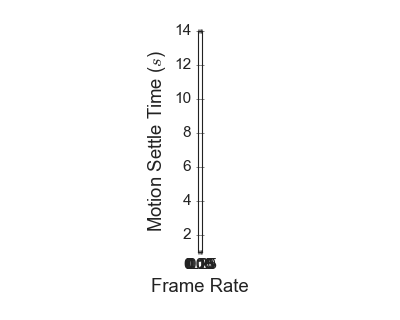

In [76]:
common_parameters = {'cmap': 'viridis',
                     'figsize': (5, 4),
                     'show_colorbar': False,
                     'show_legend': False,
                     'abbrev_label': 'mechanical',
                     'plot_type': 'smooth_regions_combined',
                     'divider_expansion_factor': 1.5,
                     'debug': False,
                     'dependent_variable': 'frame_rate',
                     'dependent_variable_sweep': np.arange(1, 15, 1),
                     'system_parameters': system_params}

mechanical_parameter_list = {'motion_settle_time': {'units': '$s$',
                                            'parameter_sweep': np.arange(0, 0.25, 0.01),
                                            'title': None,
                                            'parameter_is_log_scaled': False,
                                            },
                             'motion_acceleration': {'units': '$mm/s^2$',
                                                     'parameter_sweep': 10 ** np.arange(0, 5, 0.2),
                                                     'title': None,
                                                     'parameter_is_log_scaled': True,
                                                    },
                             'motion_velocity': {'units': '$mm/s^2$',
                                                 'parameter_sweep': np.arange(2,40,1),
                                                 'title': None,
                                                 'parameter_is_log_scaled': False,
                                                }}

# Select single parameter if desired
mechanical_parameter_list = {'motion_settle_time': mechanical_parameter_list['motion_settle_time']}

for parameter_name in mechanical_parameter_list:
    snr_coded_list, snr_sns_list, snr_strobe_list = analysis.plotParameterSweep(parameter_name, **common_parameters, **mechanical_parameter_list[parameter_name])
#     plt.savefig(os.path.join(figure_directory, '%s_analysis_%s.pdf' % ('mechanical', parameter_name)), transparent=True)

In [71]:

ax.set_aspect(1)

## Generate Illuminance Plots
- Illumination Power
- Pulse Count
- Camera QE
- Readout noise
- Magnification / NA

<IPython.core.display.Javascript object>


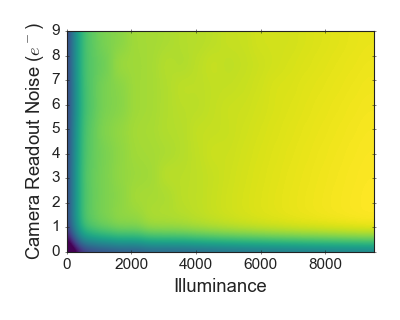

<IPython.core.display.Javascript object>


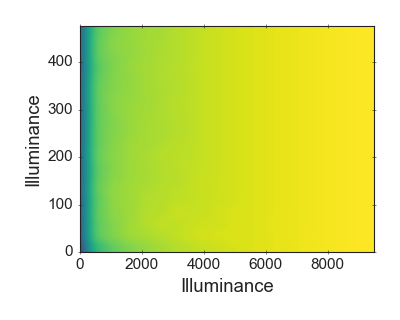

<IPython.core.display.Javascript object>


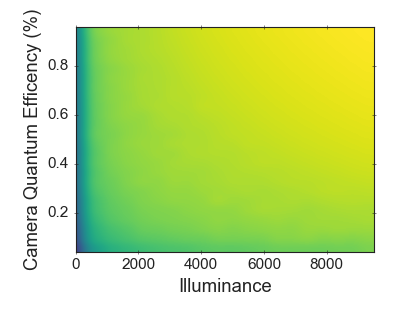

In [65]:
system_params['frame_rate'] = 11
common_parameters = {'cmap': 'viridis',
                     'figsize': (5, 4),
                     'show_colorbar': False,
                     'show_legend': False,
                     'abbrev_label': 'optical',
                     'plot_type': 'regions_combined',
                     'divider_expansion_factor': 1.5,
                     'debug': False,
                     'show_divider': False,
                     'dependent_variable': 'illuminance',
                     'dependent_variable_sweep':  np.arange(1, 10001, 500),
                     'system_parameters': system_params}

optical_parameter_list = {'camera_readout_noise': {'units': '$e^-$',
                                                   'parameter_sweep': np.arange(0, 10, 1),
                                                   'title': None,
                                                   'parameter_is_log_scaled': False,
                                                  },
                             'pulse_count': {'units': None,
                                                     'parameter_sweep': np.arange(1,500,25),
                                                     'title': None,
                                                     'parameter_is_log_scaled': False,
                                                    },
                             'camera_quantum_efficency': {'units': '%',
                                                     'parameter_sweep': np.arange(0.04, 1.0, 0.04),
                                                     'title': None,
                                                     'parameter_is_log_scaled': False,
                                                         }}

# Select single parameter if desired
# optical_parameter_list = {'camera_quantum_efficency': optical_parameter_list['camera_quantum_efficency']}

for parameter_name in optical_parameter_list:
    snr_coded_list, snr_sns_list, snr_strobe_list = analysis.plotParameterSweep(parameter_name, **common_parameters, **optical_parameter_list[parameter_name])
#     plt.savefig(os.path.join(figure_directory, '%s_analysis_%s.pdf' % ('optical', parameter_name)), transparent=True)